### PCA Impelmentation

### Import the required libraries

In [1]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

In [2]:
df = pd.read_csv('countries_of_the_world_new.csv')

# drop unknown columns
df =  df.drop('Unnamed: 0', axis = 1)

#prepare the data
x = df

In [3]:
df.shape

(227, 20)

In [4]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0,0,31056997.0,647500.00,48.0,0.0000,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380000,0.240000,0.380000
1,1,3,3581655.0,28748.00,124.6,1.2600,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232000,0.188000,0.579000
2,2,6,32930091.0,1097556.25,13.8,0.0400,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101000,0.600000,0.298000
3,3,8,57794.0,199.00,290.4,25.7125,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.150844,0.282711,0.565283
4,4,10,71201.0,468.00,152.1,0.0000,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.150844,0.282711,0.565283


## Step 1: Standardize the dataset.

### Define a function to calculate data mean and STD for one feature.


In [5]:
def calculateMean(vector):
    return np.sum(vector)/vector.shape[0]

In [6]:
def calculateStd(vector):
    s = np.sum((vector - calculateMean(vector))**2)    
    return math.sqrt(s / (vector.shape[0] - 1))

### Define a function to standardize the dataset.

In [7]:
def standarization(matrix):
    std_mat = np.array([])
    for i in range(matrix.shape[1]):
        std_mat = np.append(std_mat, ((matrix[:,i] - calculateMean(matrix[:,i])) / calculateStd(matrix[:,i])))
    final_mat = std_mat.reshape(matrix.shape[1], matrix.shape[0]).T
    return final_mat

## Step 2: Calculate the covariance matrix for the features in the dataset.

In [8]:
def covariance(matrix):
    return (matrix.T@matrix)/(matrix.shape[0])

In [9]:
def PCA(data):
    eigenvalues, eigenvectors = np.linalg.eig(covariance(standarization(data)))

    explained_variance_ratio_ = eigenvalues / np.sum(eigenvalues)
    pcaDF = pd.DataFrame({"pc": range(1,(x.shape[1] + 1)),"expl_var" : explained_variance_ratio_,  "cum_var": explained_variance_ratio_.cumsum()})

    return pcaDF, eigenvectors

In [10]:
pcaDF, eigenvectors = PCA(x.values)
pcaDF.head()

,pc,expl_var,cum_var
0,1,0.292044,0.292044
1,2,0.133514,0.425558
2,3,0.112711,0.538269
3,4,0.086081,0.624351
4,5,0.061149,0.685499


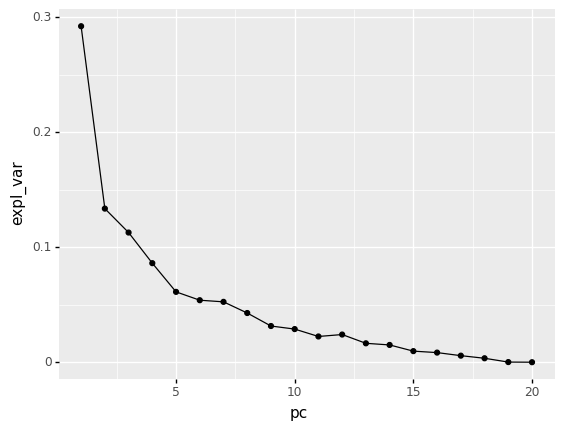

<ggplot: (8745963187526)>

In [11]:
(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point())

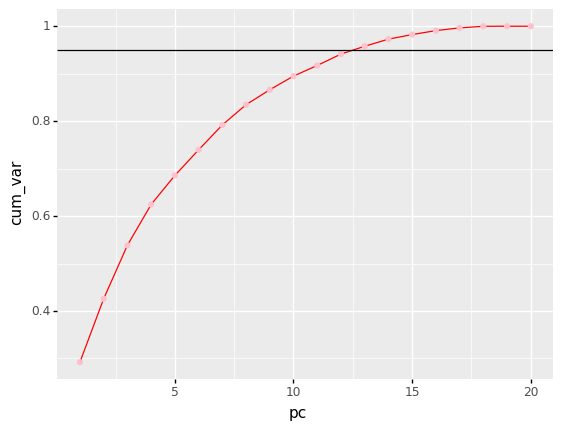

<ggplot: (8745898455833)>

In [12]:
(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line(color = "red") +
 geom_point(color = "pink") + geom_hline(yintercept = 0.95))

Text(0.5, 1.0, 'Cumulative variance vs. no.of components')

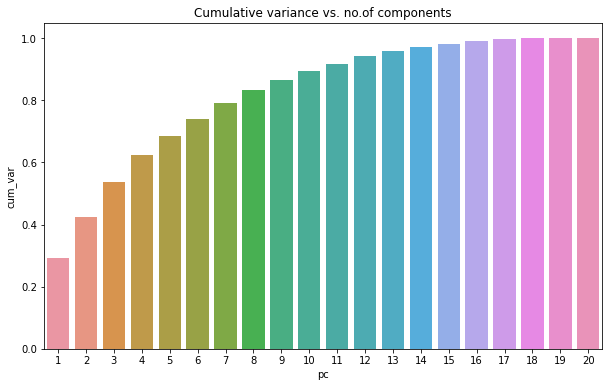

In [13]:
plt.figure(figsize = (10,6))
sns.barplot(data = pcaDF, x = 'pc', y = 'cum_var')
plt.title('Cumulative variance vs. no.of components')

In [14]:
data = x.values
n_components = 12

In [15]:
eigenvectors_reduced = eigenvectors[:, :n_components]
Mat_reduced = standarization(data) @ eigenvectors_reduced
reducedDF = pd.DataFrame(Mat_reduced)

In [16]:
reducedDF.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-5.463514,1.271603,-0.571121,-2.484409,-3.077531,-0.040741,-3.385078,-0.222711,1.603560,-0.629349,0.043310,2.671238
1,0.457703,-1.227867,0.681466,0.190540,-0.045150,-2.649238,0.061214,0.575096,0.346111,0.607009,-0.169074,-0.600260
2,-2.044526,2.737342,1.374500,1.945873,-0.346965,-0.396031,-0.509722,-2.429320,0.443964,0.487395,0.552176,-0.711692
3,1.369194,-2.609735,-0.996838,2.227927,0.787986,-1.781308,1.364580,-2.146773,-1.859324,0.795198,0.721805,-1.381266
4,2.089586,1.726657,-0.984921,-1.108057,0.908780,-1.278246,-0.510063,-0.142555,1.147524,1.478083,0.137764,-0.321784


In [17]:
reducedDF.shape

(227, 12)

In [18]:
reducedDF.to_csv('countries_of_the_world_after_PCA.csv')